Analysis and quantification of obtained results from the modelling of mineral dendrites

In [1]:
import networkx as nx
import skan
import matplotlib.pyplot as plt
from skimage.morphology import skeletonize
from skimage import data
import skimage.io as sk
import numpy as np
from glob import glob
import imageio as iio
from skimage.util import invert
from skimage import util 
import scipy.ndimage as ndimage
import cv2
import networkx as nx
import skan
import pandas as pd

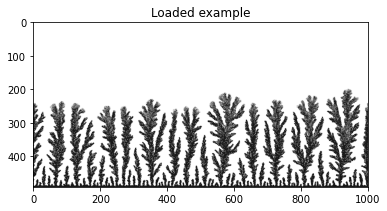

In [2]:
'''Loading example'''

consD = np.load('example.npy')
l = 5
consD = consD[0:-2*l+1]

plt.title('Loaded example')
plt.imshow(consD, cmap='Greys')
plt.show()

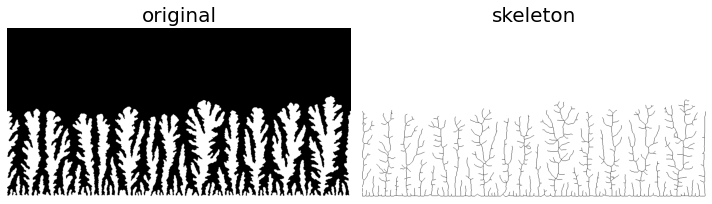

In [3]:
from skimage.morphology import skeletonize
from skimage import data
import matplotlib.pyplot as plt
from skimage.util import invert
from skimage import util 


# binarizing data
image = np.where(consD!=0, 1,0)
image = image.astype('uint8')

# filling holes 
image = ndimage.binary_fill_holes(image).astype('uint8')

image = cv2.blur(image, (3,3))
skeleton = skeletonize(image)



# display results
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5),
                         sharex=True, sharey=True)

ax = axes.ravel()

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].axis('off')
ax[0].set_title('original', fontsize=20)

ax[1].imshow(util.invert(skeleton), cmap=plt.cm.gray)
ax[1].axis('off')
ax[1].set_title('skeleton', fontsize=20)
fig.tight_layout()
plt.show()

In [4]:
# cutting the bottom

new_skeleton = skeleton
for i in range(len(skeleton[0])):
    j = -1 
    try:
        while(new_skeleton[j][i] == 0):
            j -= 1
        new_skeleton[j][i] = 0
    except:
        continue

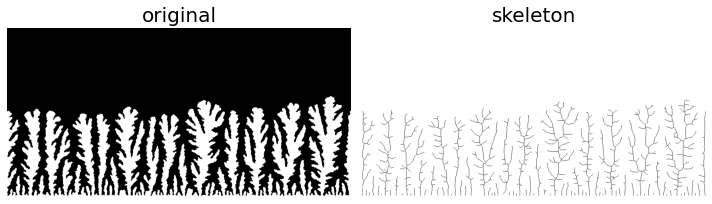

In [5]:
# display results after cutting the bottom
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5),
                         sharex=True, sharey=True)

ax = axes.ravel()

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].axis('off')
ax[0].set_title('original', fontsize=20)

ax[1].imshow(util.invert(new_skeleton), cmap=plt.cm.gray)
ax[1].axis('off')
ax[1].set_title('skeleton', fontsize=20)
fig.tight_layout()
plt.show()

<ipython-input-6-c5a0a101e4e1>:3: DeprecationWarning: 

The scipy.sparse array containers will be used instead of matrices
in Networkx 3.0. Use `from_scipy_sparse_array` instead.
  G = nx.from_scipy_sparse_matrix(g0)


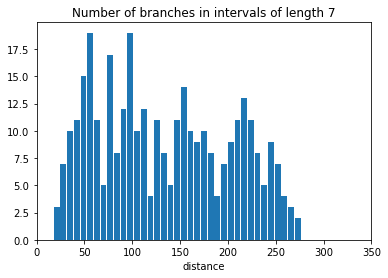

In [6]:
# calculating number of branches
g0,c0= skan.skeleton_to_csgraph(new_skeleton)
G = nx.from_scipy_sparse_matrix(g0)
indices = np.array([])
for i in G.degree():
    if (i[1] >= 3):
        indices = np.append(indices, i[0])
pts_x = len(skeleton) - \
        np.sort(np.array([c0[int(i)][0] for i in indices]))

result = []

n = 7 # interval length
for i in range(n, len(skeleton), n):
    result.append(np.count_nonzero((pts_x <= i) * (pts_x >= i - n)))
x,y = np.arange(n, len(skeleton), n), np.array(result)
plt.title(f"Number of branches in intervals of length {n}")
plt.bar(x,y,width=n-1)
plt.xlim(0,350)
plt.xlabel('distance')
plt.show()
# plt.savefig('histogram_branches.jpg', dpi = 400)

<ipython-input-7-961b41524d8b>:2: DeprecationWarning: 

The scipy.sparse array containers will be used instead of matrices
in Networkx 3.0. Use `from_scipy_sparse_array` instead.
  G = nx.from_scipy_sparse_matrix(g0)


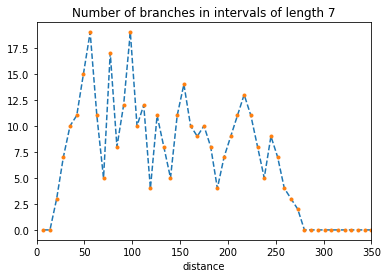

In [7]:
g0,c0= skan.skeleton_to_csgraph(new_skeleton)
G = nx.from_scipy_sparse_matrix(g0)
indices = np.array([])
for i in G.degree():
    if (i[1] >= 3):
        indices = np.append(indices, i[0])
pts_x = len(skeleton) - \
        np.sort(np.array([c0[int(i)][0] for i in indices]))

result = []

n = 7 #interval length
for i in range(n, len(skeleton), n):
    result.append(np.count_nonzero((pts_x <= i) * (pts_x >= i - n)))
x,y = np.arange(n, len(skeleton), n), np.array(result)
plt.title(f"Number of branches in intervals of length {n}")
plt.plot(x,y,'--')
plt.plot(x,y,'.')
plt.xlim(0,350)
plt.xlabel('distance')
plt.show()
# plt.savefig('plot_branches.jpg', dpi = 400)

In [8]:
# Removing branches

indices = [i for i in G]

tabs = []
while(len(indices)!=0):
    # finding paths
    tab = []
    for i in indices:
        if(nx.has_path(G, indices[0], i)):
            tab.append(i)
    tabs.append(tab)
    for j in tab:
        indices.remove(j)
        
tabs2 = tabs
for i in range(len(tabs2)):
    tabs2[i] = [tabs2[i][0], tabs2[i][-1]]

for i in range(len(tabs2)):
    tabs2[i] = nx.shortest_path(G, tabs2[i][0], tabs2[i][-1])

skeleton_copy = np.copy(skeleton).astype(int) * 0
for t in tabs2:
    for i in t:
        x = int(c0[int(i)][0])
        y = int(c0[int(i)][1])
        skeleton_copy[x][y] = 1

how_many = []
for i in skeleton_copy:
    how_many.append(np.sum(i))



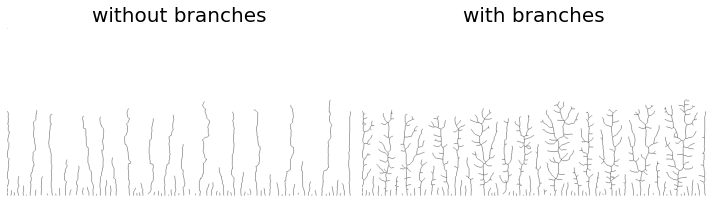

In [9]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5),
                         sharex=True, sharey=True)

ax = axes.ravel()

ax[0].imshow(util.invert(skeleton_copy), cmap=plt.cm.gray)
ax[0].axis('off')
ax[0].set_title('without branches', fontsize=20)

ax[1].imshow(util.invert(new_skeleton), cmap=plt.cm.gray)
ax[1].axis('off')
ax[1].set_title('with branches', fontsize=20)
fig.tight_layout()
plt.show()

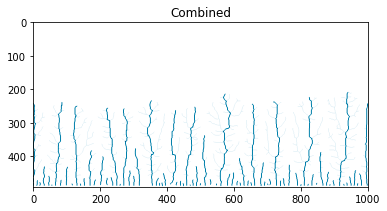

In [10]:


plt.imshow(util.invert(10*skeleton_copy+skeleton), cmap = 'ocean')

plt.title("Combined")
# plt.savefig("combined.jpg", dpi = 400)
plt.show()

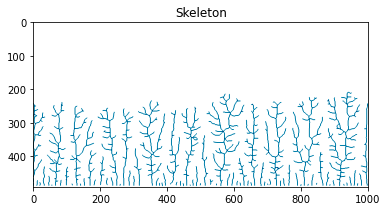

In [11]:


plt.imshow(util.invert(skeleton), cmap = 'ocean')

plt.title("Skeleton")
# plt.savefig("skeleton.jpg", dpi = 400)
plt.show()

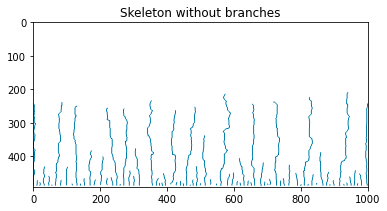

In [12]:


plt.imshow(util.invert(skeleton_copy), cmap = 'ocean')

plt.title("Skeleton without branches")
# plt.savefig("skeleton_no_branches.jpg", dpi = 400)
plt.show()

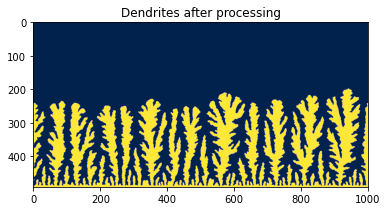

In [13]:

plt.imshow(image, cmap = 'cividis')

plt.title("Dendrites after processing")
# plt.savefig("dendrites_2.jpg", dpi = 400)
plt.show()

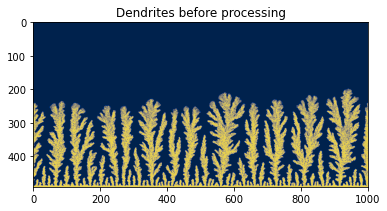

In [14]:

plt.imshow(consD, cmap = 'cividis')

plt.title("Dendrites before processing")
plt.savefig("dendrites_1.jpg", dpi = 400)
plt.show()

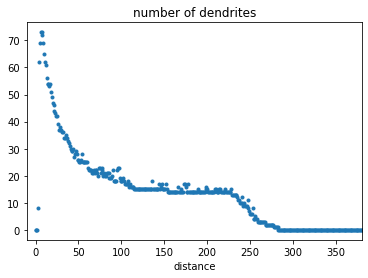

In [15]:
x,y = np.arange(0, len(how_many), 1), np.flip(how_many)
plt.plot(x,y,'.')
plt.title("number of dendrites")
plt.xlabel("distance")
plt.xlim(-10,380)
plt.show()
# plt.savefig("number.jpg", dpi = 400)

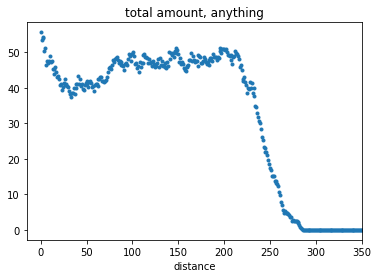

In [16]:
color = 0
limitD = 0.1
i = len(consD) - 2 * l + 1
Y = np.array([])
if(color == False):
    consD = np.where(consD == 0, 0, limitD)
while(i > 0):
    Y = np.append(Y, np.sum(consD[i]))
    i -= 1
plt.plot(np.arange(0,len(consD)-9,1),Y,'.')
plt.xlabel('distance')
plt.xlim(-15,350)
plt.title('total amount, anything')
# plt.savefig("total_amount_c0.jpg", dpi =400)
plt.show()


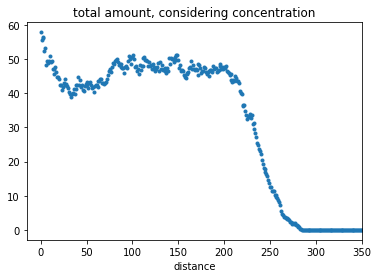

In [17]:
df=pd.read_csv('consD.csv', sep=',',header=None)
# consD = np.where(df.values[1:,1:]!=0,1,0)
consD = df.values[1:,1:]
l = 5
consD = consD[0:-2*l+1]
color = 1
limitD = 0.1
i = len(consD) - 2 * l + 1
Y = np.array([])
if(color == False):
    consD = np.where(consD == 0, 0, limitD)
while(i > 0):
    Y = np.append(Y, np.sum(consD[i]))
    i -= 1
plt.plot(np.arange(0,len(consD)-9,1),Y,'.')
plt.xlabel('distance')
plt.xlim(-15,350)
plt.title('total amount, considering concentration')
# plt.savefig("total_amount_c1.jpg", dpi =400)
plt.show()

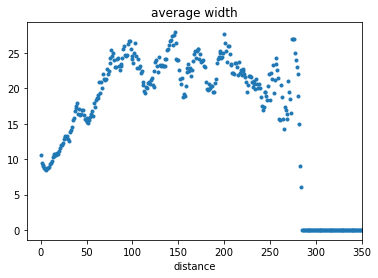

In [18]:
df=pd.read_csv('consD.csv', sep=',',header=None)
# consD = np.where(df.values[1:,1:]!=0,1,0)
consD = df.values[1:,1:]
l = 5
consD = consD[0:-2*l+1]
consD = np.where(consD > 0, 1, 0)
consD = ndimage.binary_fill_holes(consD).astype(int)
consD = cv2.blur(consD, (7,7))
i = len(consD) - 2 * l + 1
lengths = np.array([])
pom = []
avgs = np.array([])
measuring = False

while(i > 0):
    row = consD[i]
    lengths = np.array([])
    for j in range(len(row)):
        if(row[j] > 0 and measuring == False):
            start = j
            measuring = True

        if((row[j] == 0 and measuring == True) or 
           (j == len(row) - 1 and measuring == True)):
            stop = j
            if(j == len(row) - 1):
                stop += 1
            measuring = False
            lengths = np.append(lengths, stop - start)

    if(row[0] != 0 and row[-1] != 0):
        lengths[0] += lengths[-1]
        lengths = np.delete(lengths, -1)

    if(len(lengths) == 0):
        avgs = np.append(avgs, 0)
    else:
        avgs = np.append(avgs, np.average(lengths))
        pom.append(lengths)
    i -= 1

plt.plot(np.arange(0,len(consD)-9,1),avgs,'.')
plt.xlabel('distance')
plt.xlim(-15,350)
plt.title('average width')
# plt.savefig("width.jpg", dpi =400)
plt.show()